In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
# Importing matplotlib and seaborn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold


%matplotlib inline


In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing all datasets
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
len(df.describe().columns)# 38 numeric columns

38

In [7]:
df.describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
len(df.select_dtypes(include=['object']).columns) # 43 categorical

43

In [9]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

###  Missing Data treatment /Data cleaning


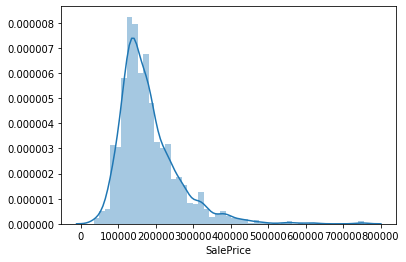

In [10]:
sns.distplot(df['SalePrice']);


In [11]:
df['SalePrice'].skew()

1.8828757597682129

In [12]:
df['SalePrice'].kurt()

6.536281860064529

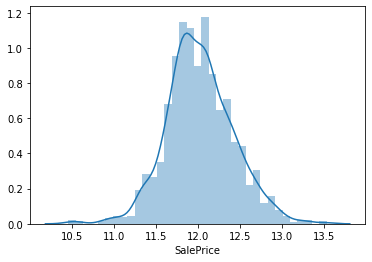

In [13]:
sns.distplot(np.log(df['SalePrice']));

In [14]:
df['TransformedPrice'] = np.log(df['SalePrice']) ## to reduce the skewness of the target variable

In [15]:
df.drop('SalePrice',axis=1,inplace=True)

In [16]:
df.isna().sum().sort_values(ascending=False).head(60) ## features with missing data from high to low 

PoolQC              1453
MiscFeature         1406
Alley               1369
Fence               1179
FireplaceQu          690
LotFrontage          259
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0
Exterior2nd            0
Exterior1st            0
RoofMatl               0
RoofStyle              0
YearBuilt              0
LotConfig              0
OverallCond            0
OverallQual            0
HouseStyle             0
BldgType               0
Condition2             0
BsmtFinSF1             0
MSZoning               0
LotArea                0
Street                 0


In [17]:
len(df) # length of data is 1460 records

1460

In [18]:
x = len(df)/2 # taking 1/2 value
x

730.0

In [19]:
df.columns[df.isnull().sum() > x] # column whose more than 50% value is null

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [20]:
# For these features from data dictionary NA needs to be replaced instead of missing

In [21]:
df.Alley.unique() ## Here missing actually means NA as per data dictionary

array([nan, 'Grvl', 'Pave'], dtype=object)

In [22]:
## these missing are NA values 

In [23]:
 str_cols = ['Alley','Fence','PoolQC','MiscFeature']

In [24]:
df[str_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
Alley          91 non-null object
Fence          281 non-null object
PoolQC         7 non-null object
MiscFeature    54 non-null object
dtypes: object(4)
memory usage: 45.8+ KB


In [25]:
df[str_cols]=df[str_cols].fillna('NA')


In [26]:
df.isna().sum().sort_values(ascending=False).head(60) ## features with missing data from high to low 

FireplaceQu         690
LotFrontage         259
GarageType           81
GarageCond           81
GarageYrBlt          81
GarageFinish         81
GarageQual           81
BsmtExposure         38
BsmtFinType2         38
BsmtFinType1         37
BsmtCond             37
BsmtQual             37
MasVnrArea            8
MasVnrType            8
Electrical            1
LandContour           0
RoofMatl              0
Exterior1st           0
Exterior2nd           0
Foundation            0
ExterQual             0
ExterCond             0
YearRemodAdd          0
MSSubClass            0
BsmtFinSF1            0
RoofStyle             0
YearBuilt             0
Utilities             0
Alley                 0
LotConfig             0
LandSlope             0
Neighborhood          0
Condition1            0
Condition2            0
LotShape              0
BldgType              0
OverallCond           0
HouseStyle            0
Street                0
LotArea               0
BsmtFinSF2            0
MSZoning        

In [27]:
df.columns[df.isnull().sum() > x] # column whose more than 50% value is null , no need to drop columns we will check if they van be imputed

Index([], dtype='object')

In [28]:
categorical_col=df.select_dtypes(include=['object']).columns # our categorical columns, we start with categorical column treatment

In [29]:
## printing sum of mull for categorical ones

for col in categorical_col:
    if df[col].isnull().sum()>0:
        print(col,df[col].isnull().sum())


MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [30]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [31]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode().iloc[0])# We can replace with None in mising cases 

In [32]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [33]:
sum(df.BsmtQual.isna())

37

In [34]:
df.BsmtCond.isna().sum()

37

In [35]:
df.BsmtExposure.isna().sum()

38

In [36]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [37]:
df[df.BsmtExposure.isna()][['BsmtQual','TotalBsmtSF']] 

,BsmtQual,TotalBsmtSF
17,NaN,0
39,NaN,0
90,NaN,0
102,NaN,0
156,NaN,0
182,NaN,0
259,NaN,0
342,NaN,0
362,NaN,0
371,NaN,0


In [38]:
df.loc[(df.BsmtExposure.isna()) & (df.TotalBsmtSF > 0),"BsmtExposure"]="No"

In [39]:
# one value in index number 948 , basement area isnt null only exposure is null which can be replaced by  No exposure , othersb are NA no basement

In [40]:
df.BsmtExposure.isna().sum()

37

In [41]:
df[df.BsmtExposure.isna()][['BsmtQual','TotalBsmtSF']] 

,BsmtQual,TotalBsmtSF
17,NaN,0
39,NaN,0
90,NaN,0
102,NaN,0
156,NaN,0
182,NaN,0
259,NaN,0
342,NaN,0
362,NaN,0
371,NaN,0


In [42]:
df.BsmtExposure.value_counts() # No count replaced verified 

No    954
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [43]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [44]:
df.loc[(df.BsmtFinType2.isna()) & (df.TotalBsmtSF > 0)] # one record with bsmt area not zero we will replace with mode

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TransformedPrice
332,333,20,RL,85.0,10655,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,10,2009,WD,Normal,12.55673


In [45]:
df.loc[(df.BsmtFinType2.isna()) & (df.TotalBsmtSF > 0),"BsmtFinType2"]=df['BsmtFinType2'].mode().iloc[0]

In [46]:
df.BsmtFinType2.value_counts()

Unf    1257
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [47]:
df[df.BsmtQual.isna()] [['BsmtQual','BsmtCond','TotalBsmtSF','BsmtExposure']] ## All these columns are missing for zero TotalBsmtSF

,BsmtQual,BsmtCond,TotalBsmtSF,BsmtExposure
17,NaN,NaN,0,NaN
39,NaN,NaN,0,NaN
90,NaN,NaN,0,NaN
102,NaN,NaN,0,NaN
156,NaN,NaN,0,NaN
182,NaN,NaN,0,NaN
259,NaN,NaN,0,NaN
342,NaN,NaN,0,NaN
362,NaN,NaN,0,NaN
371,NaN,NaN,0,NaN


In [48]:
# for all missing values seems they dont have a basement and total basementarea is 0, hence will impute with NA - No basement for these 37 missing values

In [49]:
cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [50]:
df[cols].isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    37
BsmtFinType1    37
BsmtFinType2    37
dtype: int64

In [51]:
df[cols]=df[cols].fillna('NA')

In [52]:
df[cols].isna().sum() # check if missing replaced

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [53]:
df['MasVnrType'].mode().iloc[0]

'None'

In [54]:
df[df.MasVnrType.isna()].MasVnrArea

Series([], Name: MasVnrArea, dtype: float64)

In [55]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [56]:
# no fireplace is NA , missing can be assumed to be NA

In [57]:
df.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [58]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [59]:
df[df.Electrical.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TransformedPrice
1379,1380,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2008,WD,Normal,12.028739


In [60]:
# replacing by mode
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode().iloc[0])

In [61]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [62]:
df[df.FireplaceQu.isna()][['Fireplaces']] # The missing values has no Fireplaces

,Fireplaces
0,0
5,0
10,0
12,0
15,0
...,...
1452,0
1453,0
1454,0
1458,0


In [63]:
df['FireplaceQu']=df['FireplaceQu'].fillna('NA')

In [64]:
df[df.GarageType.isna()][['GarageFinish','GarageQual','GarageCond']] ## all Garage values are missing it would no Garage property

,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN
48,NaN,NaN,NaN
78,NaN,NaN,NaN
88,NaN,NaN,NaN
89,NaN,NaN,NaN
...,...,...,...
1349,NaN,NaN,NaN
1407,NaN,NaN,NaN
1449,NaN,NaN,NaN
1450,NaN,NaN,NaN


In [65]:
col=['GarageType','GarageFinish','GarageQual','GarageCond']

In [66]:
df[col]=df[col].fillna('NA')

In [67]:
## Finish of all categorical var missing values imputation

In [68]:
## Numerical variables imputation

In [69]:
num_cols=df.describe().columns

In [70]:
for col in num_cols:
    if df[col].isnull().sum()>0:
        print(col,df[col].isnull().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [71]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [72]:
df[df.LotFrontage.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TransformedPrice
7,8,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,2009,WD,Normal,12.206073
12,13,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,11.877569
14,15,20,RL,NaN,10920,Pave,NA,IR1,Lvl,AllPub,...,0,NA,GdWo,NA,0,5,2008,WD,Normal,11.964001
16,17,20,RL,NaN,11241,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,700,3,2010,WD,Normal,11.911702
24,25,20,RL,NaN,8246,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,5,2010,WD,Normal,11.944708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,4,2007,WD,Normal,12.116695
1431,1432,120,RL,NaN,4928,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,10,2009,WD,Normal,11.875831
1441,1442,120,RM,NaN,4426,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2008,WD,Normal,11.913713
1443,1444,30,RL,NaN,8854,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2009,WD,Normal,11.703546


In [73]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [74]:
## we can replace with mean or median as they are almost same 

In [75]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())


In [76]:
df[df['MasVnrArea'].isna()][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,None
529,NaN,None
650,NaN,None
936,NaN,None
973,NaN,None
977,NaN,None
1243,NaN,None
1278,NaN,None


In [77]:
## Above MasVnrType= None for the missing data

In [78]:
df[df.MasVnrType== "None"][['MasVnrType','MasVnrArea']] 

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
...,...,...
1454,None,0.0
1455,None,0.0
1457,None,0.0
1458,None,0.0


In [79]:
## for MasVnrType= None we can replace MasVnrArea as zero for the missing ones

In [80]:
df['MasVnrArea']=df['MasVnrArea'].fillna(0)


In [81]:
df['MasVnrArea'].value_counts()

0.0      869
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [82]:
df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [83]:
df[df.GarageYrBlt.isna()]['GarageType']

39      NA
48      NA
78      NA
88      NA
89      NA
        ..
1349    NA
1407    NA
1449    NA
1450    NA
1453    NA
Name: GarageType, Length: 81, dtype: object

In [84]:
# this means these are missing data for house without Garage 

In [85]:
df.GarageYrBlt=df.GarageYrBlt.fillna(0)

In [86]:
## we have completed data imputation for all features , recheching now except GarageYrBlt which we are not handling 

In [87]:
df.isna().sum().sort_values(ascending=False).head(60) ## features with missing data from high to low 

TransformedPrice    0
Heating             0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
YearRemodAdd        0
YearBuilt           0
OverallCond         0
LandContour         0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
Utilities           0
OverallQual         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
TotalBsmtSF         0
HeatingQC           0
SaleCondition       0
CentralAir          0
GarageArea          0
GarageQual          0
GarageCond

In [88]:

# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
  
# printing todays date
print("Current date: ", todays_date)
  
# fetching the current year, month and day of today
print("Current year:", todays_date.year)
print("Current month:", todays_date.month)
print("Current day:", todays_date.day)

Current date:  2021-04-26
Current year: 2021
Current month: 4
Current day: 26


In [89]:
type(todays_date.year)

int

In [90]:
df.YearBuilt= todays_date.year-df.YearBuilt
df.YearRemodAdd=todays_date.year-df.YearRemodAdd
df.YrSold=todays_date.year-df.YrSold
df.GarageYrBlt=todays_date.year-df.GarageYrBlt

In [91]:
df.drop(['YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'], axis=1,inplace=True)

In [92]:
num_cols=df.describe().columns

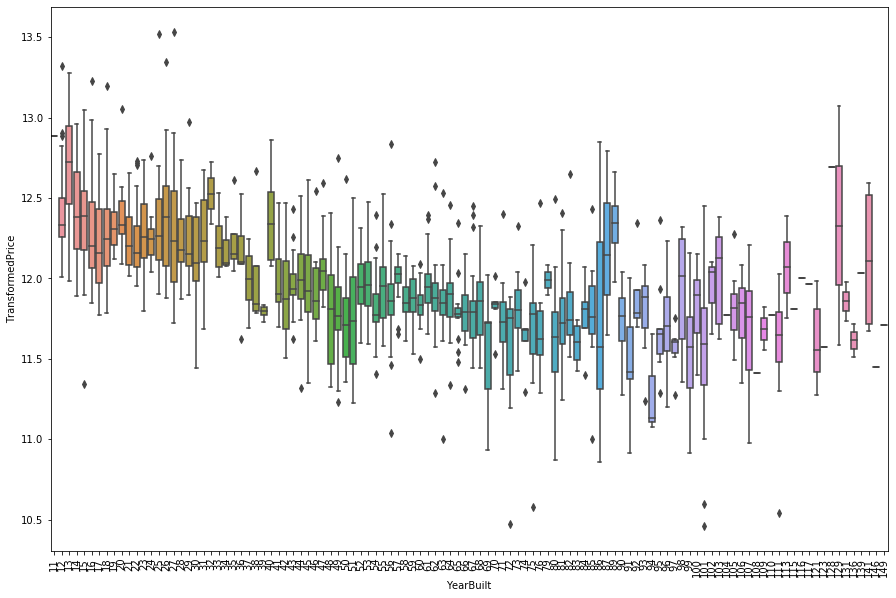

In [93]:
plt.figure(figsize=(15,10))

sns.boxplot(x='YearBuilt',y='TransformedPrice',data=df)  # using boxplot

plt.xticks(rotation=90);


In [94]:
## Price higher for new house and decreases gradually, some peak towards very old houses- has a negative correlation 

## Outlier analysis

In [95]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TransformedPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,49.732192,103.117123,443.639726,46.549315,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,12.024051
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,180.731373,456.098091,161.319273,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,0.399452
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460242
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,21.000000,0.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.775097
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,48.000000,0.000000,383.500000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.001505
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,67.000000,164.250000,712.250000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.273731
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,96.100000,335.000000,1065.500000,117.200000,...,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,12.535376
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,105.000000,456.000000,1274.000000,396.200000,...,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,12.694958
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,121.820000,791.280000,1572.410000,830.380000,...,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,13.000323


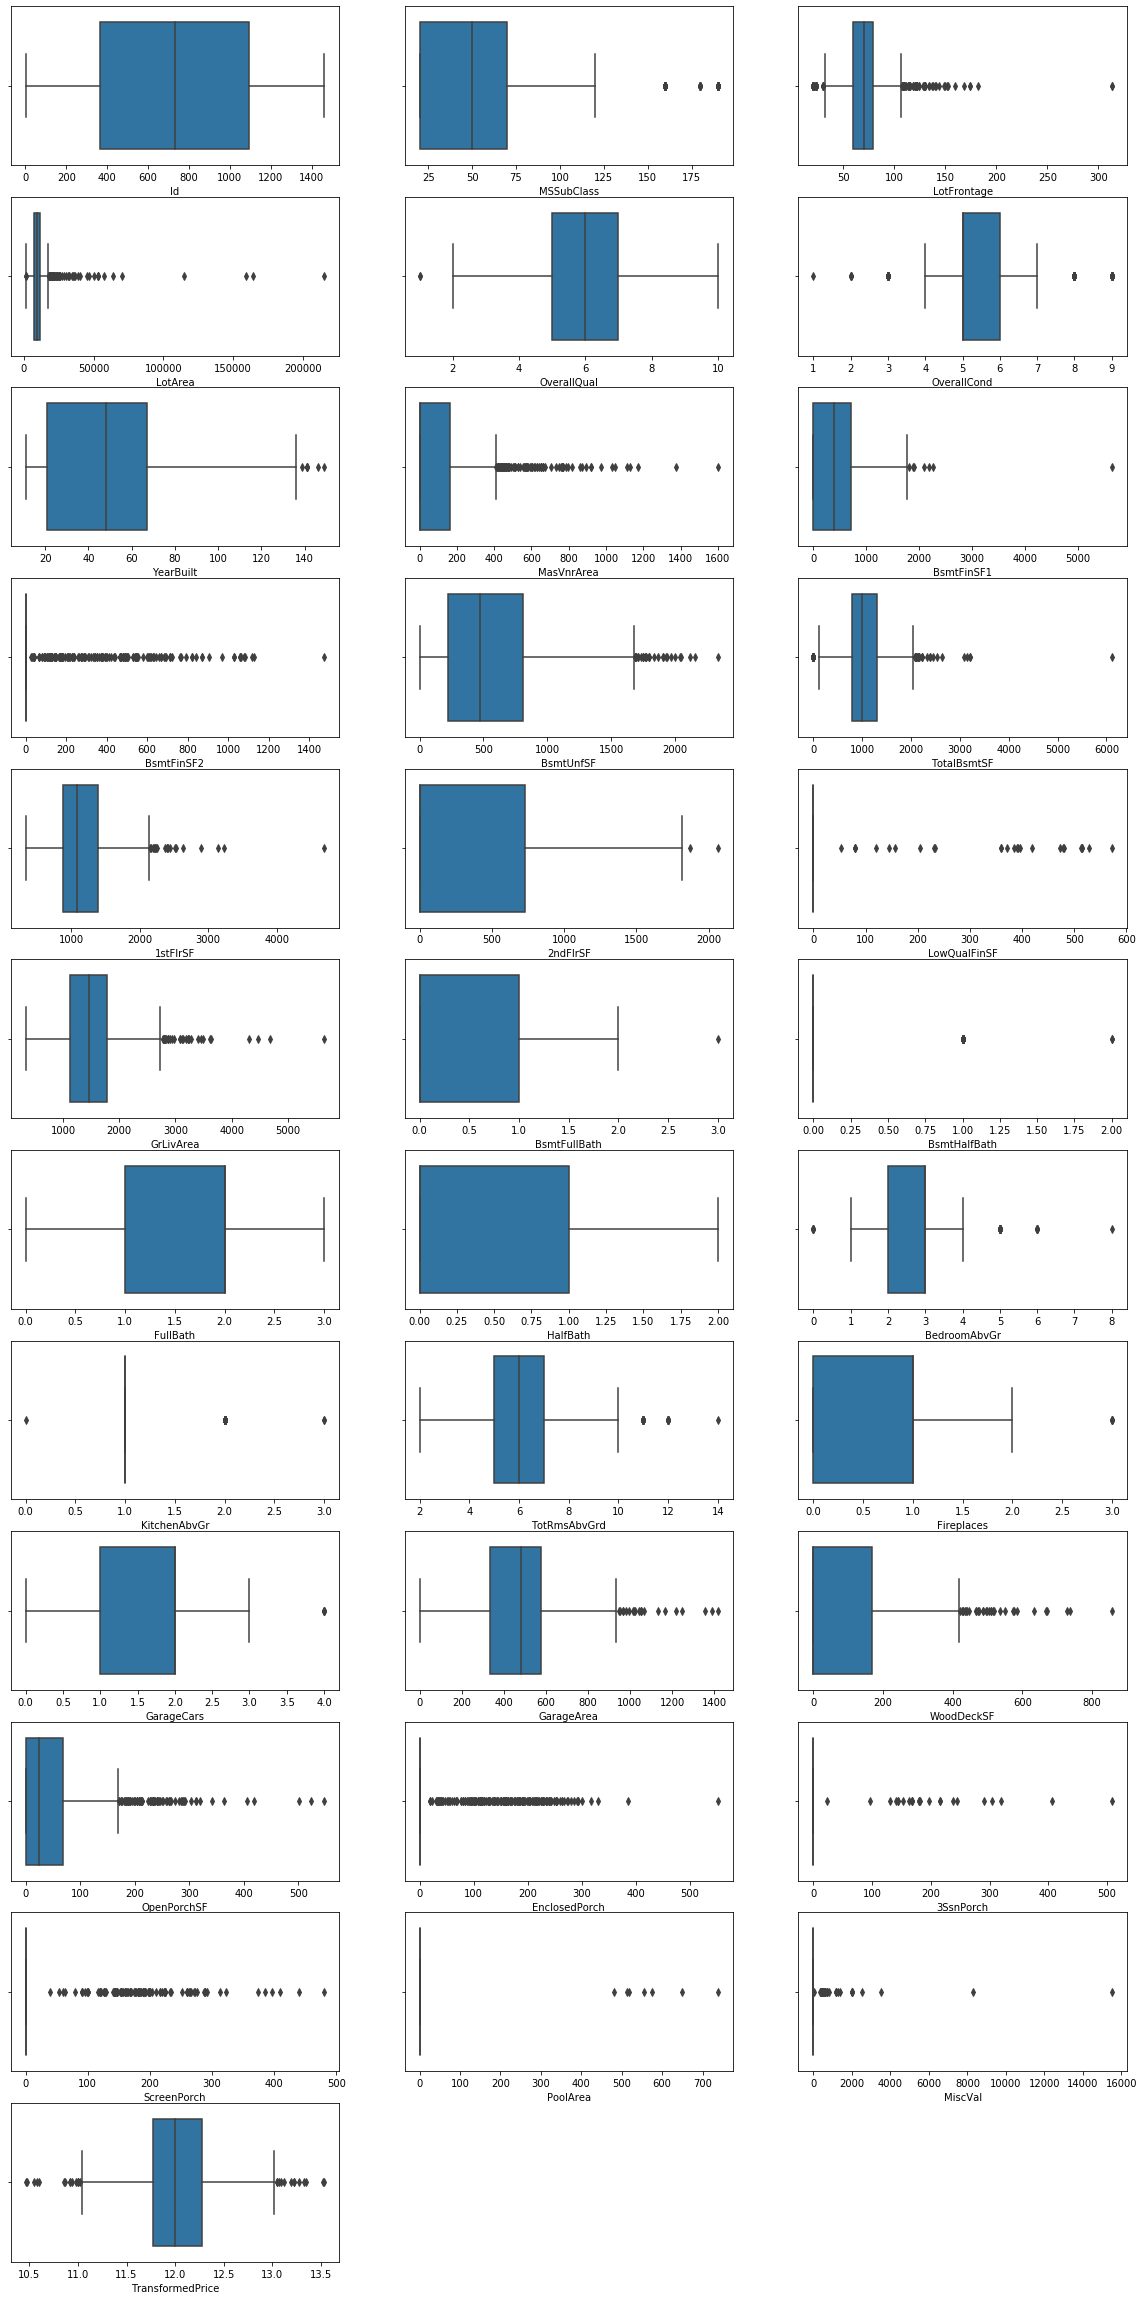

In [96]:
plt.figure(figsize=(20,45))
plt.tight_layout()

# Title names for the columns in the dataset


# Visualising the outliers with boxplot for all the variables 
for i in enumerate(num_cols):
    plt.subplot(13,3,i[0]+1)
    sns.boxplot(x=df[i[1]],data=df)  # using boxplot
        

In [97]:
df.MSSubClass.dtype

dtype('int64')

In [98]:
df.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [99]:
df['MSSubClass'] = df['MSSubClass'].map({20:"1SN",
    30:"1SO",
    40:"1SF",
    45:"1HSUF",
    50:"1HSF",
    60:"2SN",
    70:"2SO",
    75:"2HS",
    80:"SPLIT",
    85:"SPLIT_FOYER",
    90:"DUPLEX",
    120:"1SPUD",
    150:"1HSTPUD",
    160:"2SPUD",
    180:"PUD",
    190:"2FC"
    })

In [100]:
df.MSSubClass.dtype

dtype('O')

In [101]:
df.MSSubClass.value_counts() # converted to object type

1SN            536
2SN            299
1HSF           144
1SPUD           87
1SO             69
2SPUD           63
2SO             60
SPLIT           58
DUPLEX          52
2FC             30
SPLIT_FOYER     20
2HS             16
1HSUF           12
PUD             10
1SF              4
Name: MSSubClass, dtype: int64

In [102]:
df.LotFrontage.describe(percentiles=[0.01,.1,.25, .5, .75, .90, .95, .99])

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
1%         21.000000
10%        49.000000
25%        60.000000
50%        70.049958
75%        79.000000
90%        92.000000
95%       104.000000
99%       137.410000
max       313.000000
Name: LotFrontage, dtype: float64

In [103]:
##For - Soft Capping: We use 1-99 as percentile cutoff


In [104]:
#for  LotFrontage we chose   soft capping for the max outlier seen

In [105]:
df.LotArea.describe(percentiles=[0.01,.1,.25, .5, .75, .90, .95, .99])

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
1%         1680.000000
10%        5000.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
90%       14381.700000
95%       17401.150000
99%       37567.640000
max      215245.000000
Name: LotArea, dtype: float64

In [106]:
# for LotArea outliers on the upper extreme are more we will do soft capping again here

In [107]:
df.OverallQual=df.OverallQual.map({10:"Very Excellent",
9:"Excellent",
8:"Very Good",
7:"Good",
6:"Above Average",
5:"Average",
4:"Below Average",
3:"Fair",
2:"Poor",
1:"Very Poor"})

In [108]:
df.OverallQual.value_counts()

Average           397
Above Average     374
Good              319
Very Good         168
Below Average     116
Excellent          43
Fair               20
Very Excellent     18
Poor                3
Very Poor           2
Name: OverallQual, dtype: int64

In [109]:
df.OverallQual.dtype

dtype('O')

In [110]:
df.OverallCond=df.OverallCond.map({10:"Very Excellent",
9:"Excellent",
8:"Very Good",
7:"Good",
6:"Above Average",
5:"Average",
4:"Below Average",
3:"Fair",
2:"Poor",
1:"Very Poor"})

In [111]:
df.OverallCond.dtype

dtype('O')

In [112]:
# do nothing to YearBuilt , YearRemodAdd very few outliers which are not noise


In [113]:
df.MasVnrArea.describe(percentiles=[0.01,.1,.25, .5, .75, .90, .95, .99])  #this can used for soft capping

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
1%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
90%       335.000000
95%       456.000000
99%       791.280000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [114]:
df.BsmtFinSF1.describe(percentiles=[0.01,.1,.25, .5, .75, .90, .95, .99]) ## we will do soft capping as max value is way apart 

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
1%          0.000000
10%         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
90%      1065.500000
95%      1274.000000
99%      1572.410000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [115]:
df.BsmtFinSF2.describe(percentiles=[0.01,.1,.25, .5, .75, .90, .95, .99]) ## wont treat this as there is not large difference between 99% values 

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
1%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%       117.200000
95%       396.200000
99%       830.380000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [116]:
df[df.BsmtFinSF2 == 0]['BsmtFinType2'] ## seems most are 0 as its unfinished basement

0       Unf
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1452    Unf
1453    Unf
1454    Unf
1455    Unf
1457    Unf
Name: BsmtFinType2, Length: 1293, dtype: object

In [117]:
df.BsmtUnfSF.describe(percentiles=[0.01,.1,.25, .5, .75, .90, .95, .99])  ## wont treat it doesnt seem noise

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
1%          0.000000
10%        74.900000
25%       223.000000
50%       477.500000
75%       808.000000
90%      1232.000000
95%      1468.000000
99%      1797.050000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

In [118]:
df.TotalBsmtSF.describe(percentiles=[0.01,.1,.25, .5, .75, .90, .95, .99]) # will treat this as few are way away from regular values

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
1%          0.000000
10%       636.900000
25%       795.750000
50%       991.500000
75%      1298.250000
90%      1602.200000
95%      1753.000000
99%      2155.050000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [119]:
df['1stFlrSF'].describe(percentiles=[0.01,.1,.25, .5, .75, .90, .95, .99])

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
1%        520.000000
10%       756.900000
25%       882.000000
50%      1087.000000
75%      1391.250000
90%      1680.000000
95%      1831.250000
99%      2219.460000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [120]:
df.BsmtFullBath.value_counts() ## no treatment many property could have more baths , its not noise

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [121]:
df['PoolArea'].describe(percentiles=[0.01,.1,.25, .5, .75, .90, .95, .99]) ## we wont treat these some property could have big pool area others no pool

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
1%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

In [122]:
df[df['PoolArea'] == 0]['PoolQC'] # many without Pool no treatment needed for outliers

0       NA
1       NA
2       NA
3       NA
4       NA
        ..
1455    NA
1456    NA
1457    NA
1458    NA
1459    NA
Name: PoolQC, Length: 1453, dtype: object

In [123]:
df.MiscVal.describe(percentiles=[0.01,.1,.25, .5, .75, .90, .95, .99]) ## outliers need treatment

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
1%           0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.000000
99%        700.000000
max      15500.000000
Name: MiscVal, dtype: float64

In [124]:
col=['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GrLivArea','MiscVal']

In [125]:
for i in col:
    q1 = df[i].quantile(0.01)
    q4 = df[i].quantile(0.99)
    df[i][df[i]<=q1] = q1
    df[i][df[i]>=q4] = q4

In [126]:
## After outlier treatment seeing the box plot

In [127]:
num_cols=df.describe().columns

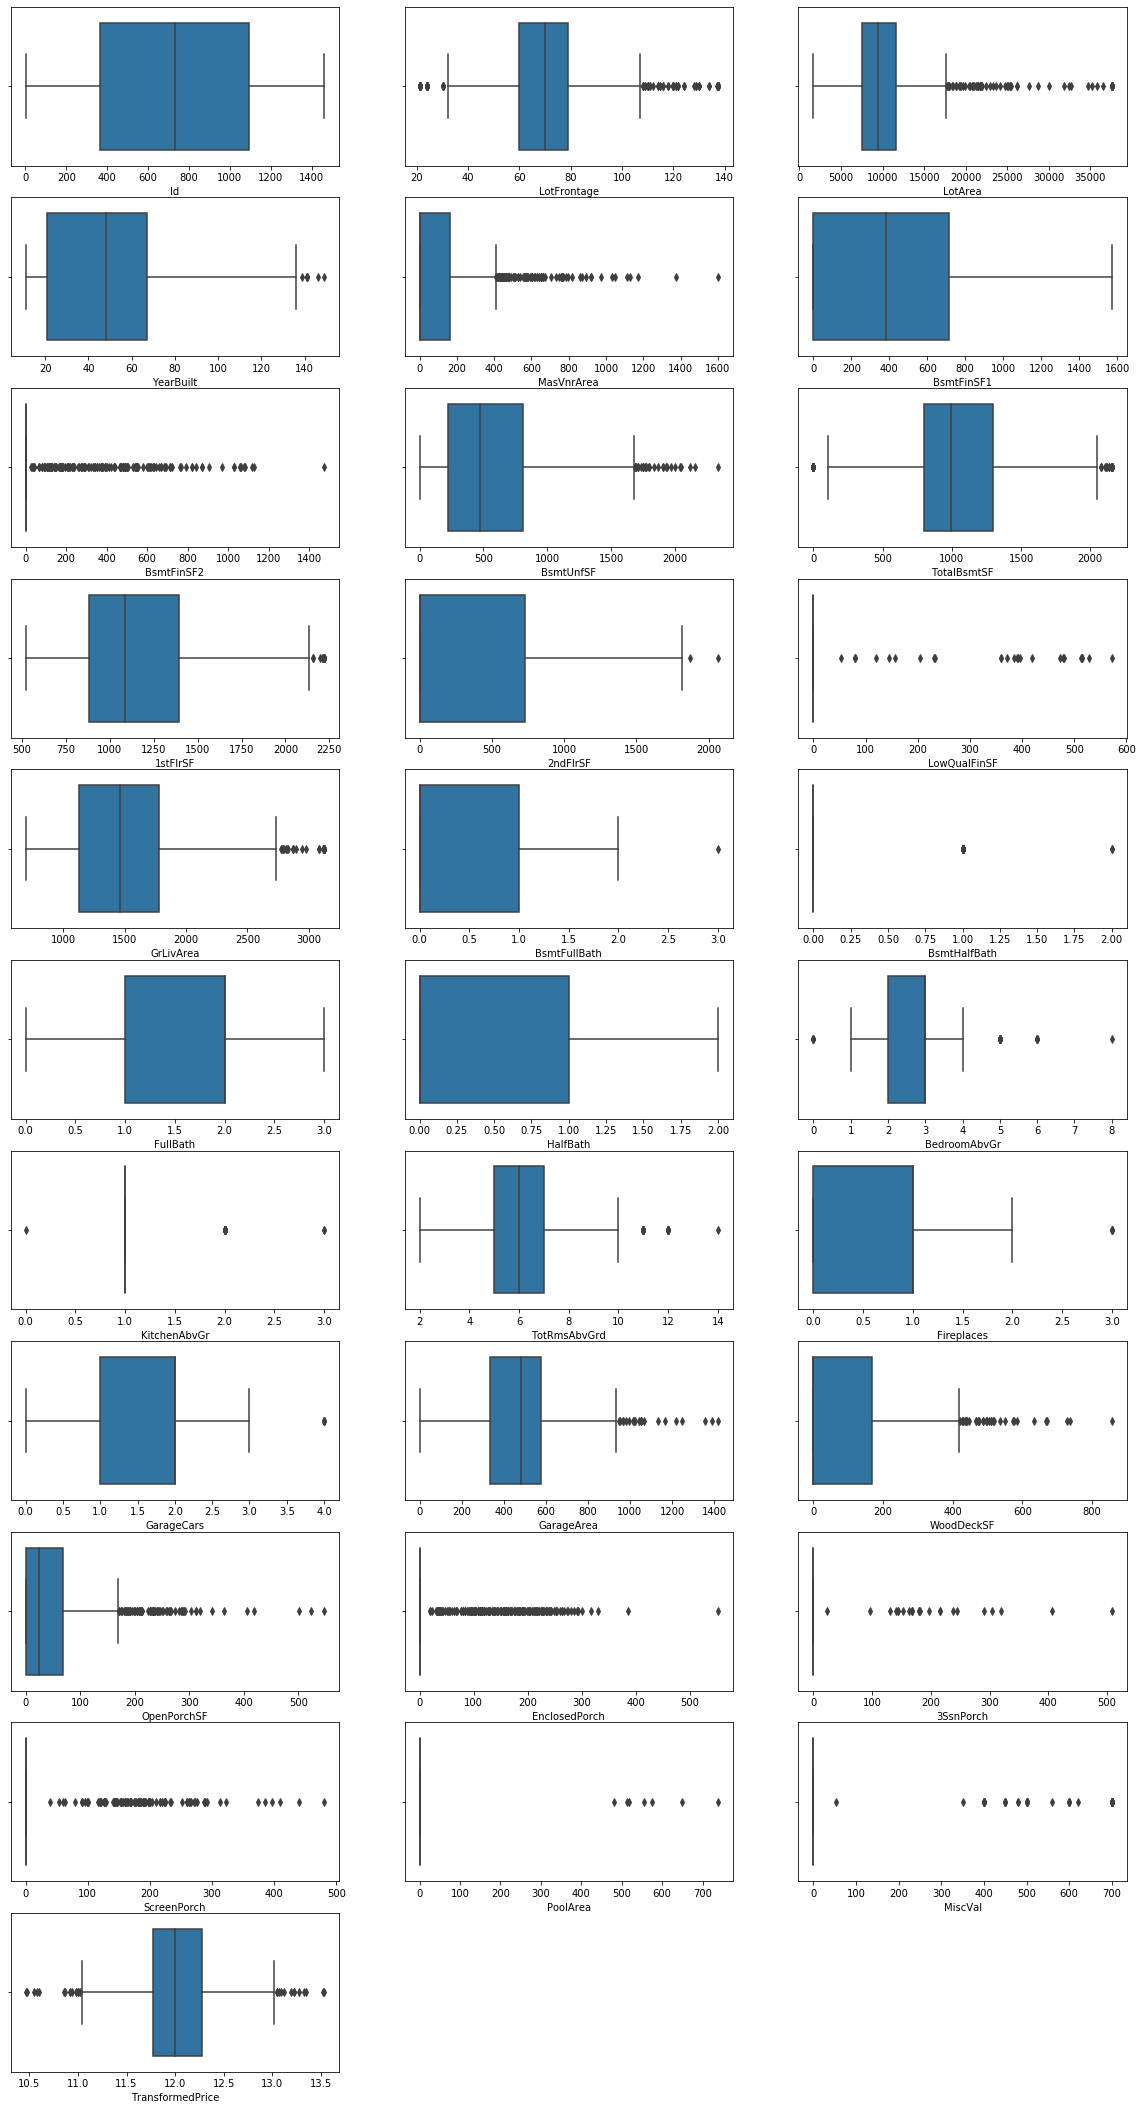

In [128]:
plt.figure(figsize=(20,45))
plt.tight_layout()

# Title names for the columns in the dataset


# Visualising the outliers with boxplot for all the numeric var after outlier treatment 
for i in enumerate(num_cols):
    plt.subplot(13,3,i[0]+1)
    sns.boxplot(x=df[i[1]],data=df)  # using boxplot

## Pair Plot of numeric columns

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id                  1460 non-null int64
MSSubClass          1460 non-null object
MSZoning            1460 non-null object
LotFrontage         1460 non-null float64
LotArea             1460 non-null float64
Street              1460 non-null object
Alley               1460 non-null object
LotShape            1460 non-null object
LandContour         1460 non-null object
Utilities           1460 non-null object
LotConfig           1460 non-null object
LandSlope           1460 non-null object
Neighborhood        1460 non-null object
Condition1          1460 non-null object
Condition2          1460 non-null object
BldgType            1460 non-null object
HouseStyle          1460 non-null object
OverallQual         1460 non-null object
OverallCond         1460 non-null object
YearBuilt           1460 non-null int64
RoofStyle           1460 non-null object
RoofMatl            1460 non-nul

In [130]:
df_numeric = df.select_dtypes(include=['float64','int64'])

In [131]:
df_numeric


,Id,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TransformedPrice
0,1,65.0,8450.0,18,196.0,706.0,0,150,856.0,856.0,...,2,548,0,61,0,0,0,0,0,12.247694
1,2,80.0,9600.0,45,0.0,978.0,0,284,1262.0,1262.0,...,2,460,298,0,0,0,0,0,0,12.109011
2,3,68.0,11250.0,20,162.0,486.0,0,434,920.0,920.0,...,2,608,0,42,0,0,0,0,0,12.317167
3,4,60.0,9550.0,106,0.0,216.0,0,540,756.0,961.0,...,3,642,0,35,272,0,0,0,0,11.849398
4,5,84.0,14260.0,21,350.0,655.0,0,490,1145.0,1145.0,...,3,836,192,84,0,0,0,0,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917.0,22,0.0,0.0,0,953,953.0,953.0,...,2,460,0,40,0,0,0,0,0,12.072541
1456,1457,85.0,13175.0,43,119.0,790.0,163,589,1542.0,2073.0,...,2,500,349,0,0,0,0,0,0,12.254863
1457,1458,66.0,9042.0,80,0.0,275.0,0,877,1152.0,1188.0,...,1,252,0,60,0,0,0,0,700,12.493130
1458,1459,68.0,9717.0,71,0.0,49.0,1029,0,1078.0,1078.0,...,1,240,366,0,112,0,0,0,0,11.864462


In [132]:
len(df_numeric)

1460

In [133]:
#sns.pairplot(df_numeric) ## too large we will check out features which are strong correlation with target

In [134]:
c2=df[df.columns[1:]].corr()['TransformedPrice'][:]


In [135]:
df2=c2.sort_values(ascending = False).head(10) ## features strongly correlated with Price

In [136]:
df2.index[1:]

Index(['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea'],
      dtype='object')

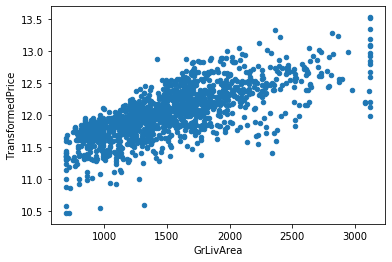

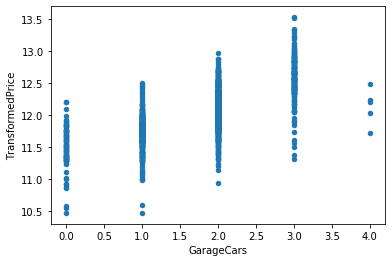

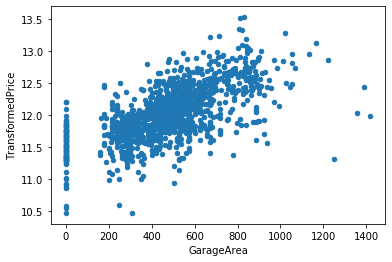

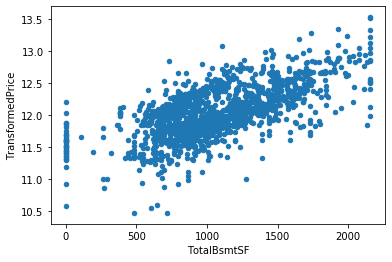

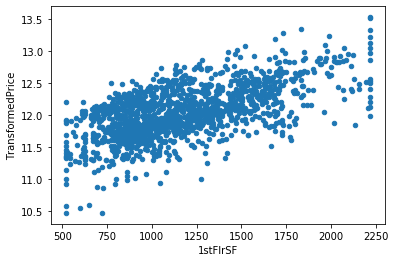

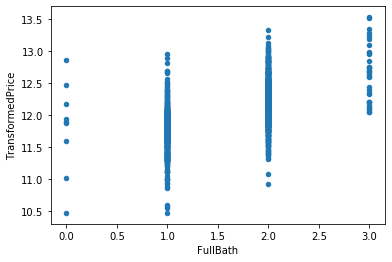

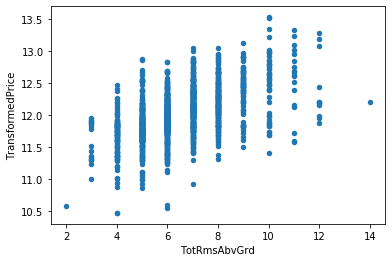

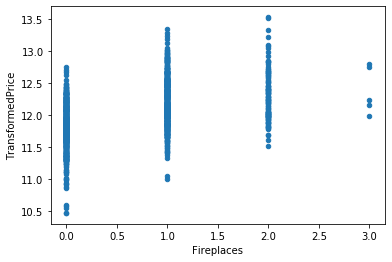

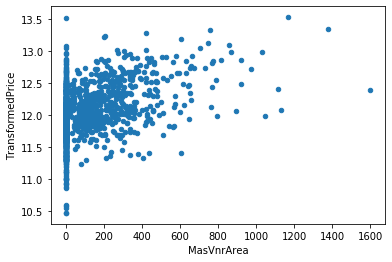

In [137]:
## scatter of top strongly correlated variables
for col in df2.index[1:]:
    df.plot.scatter(x=col, y='TransformedPrice');


In [138]:
#GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF   showing linear relationship with target varirable

## Correlation between features

In [139]:
corr = df.corr() # df is the pandas dataframe
new_corr = corr[corr<1]
c1 = new_corr.abs().unstack()
c1.sort_values(ascending = False).head(60)

GarageCars        GarageArea          0.882475
GarageArea        GarageCars          0.882475
TotRmsAbvGrd      GrLivArea           0.836635
GrLivArea         TotRmsAbvGrd        0.836635
1stFlrSF          TotalBsmtSF         0.803791
TotalBsmtSF       1stFlrSF            0.803791
GrLivArea         TransformedPrice    0.717023
TransformedPrice  GrLivArea           0.717023
2ndFlrSF          GrLivArea           0.694715
GrLivArea         2ndFlrSF            0.694715
GarageCars        TransformedPrice    0.680625
TransformedPrice  GarageCars          0.680625
BedroomAbvGr      TotRmsAbvGrd        0.676620
TotRmsAbvGrd      BedroomAbvGr        0.676620
BsmtFullBath      BsmtFinSF1          0.663430
BsmtFinSF1        BsmtFullBath        0.663430
TransformedPrice  GarageArea          0.650888
GarageArea        TransformedPrice    0.650888
TotalBsmtSF       TransformedPrice    0.644370
TransformedPrice  TotalBsmtSF         0.644370
FullBath          GrLivArea           0.641615
GrLivArea    

In [140]:
df.drop(['GarageCars','TotRmsAbvGrd','TotalBsmtSF'],axis=1,inplace=True)

In [141]:
# heatmap

#sns.heatmap(cor, annot=True);

In [142]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch',

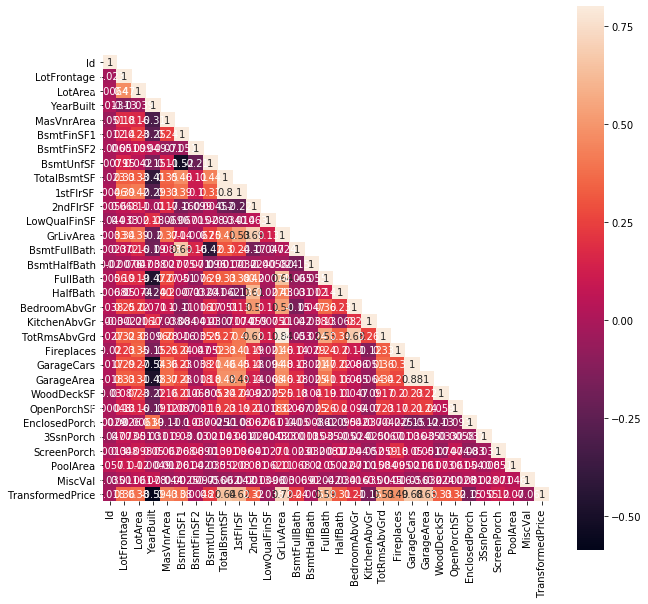

In [143]:

mask = np.array(corr)
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr, mask=mask, vmax=0.8, square=True, annot=True);
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

## Categorical Var Visualation

In [144]:
categorical_col=df.select_dtypes(include=['object']).columns

In [145]:
len(categorical_col)

46

In [146]:
categorical_col

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

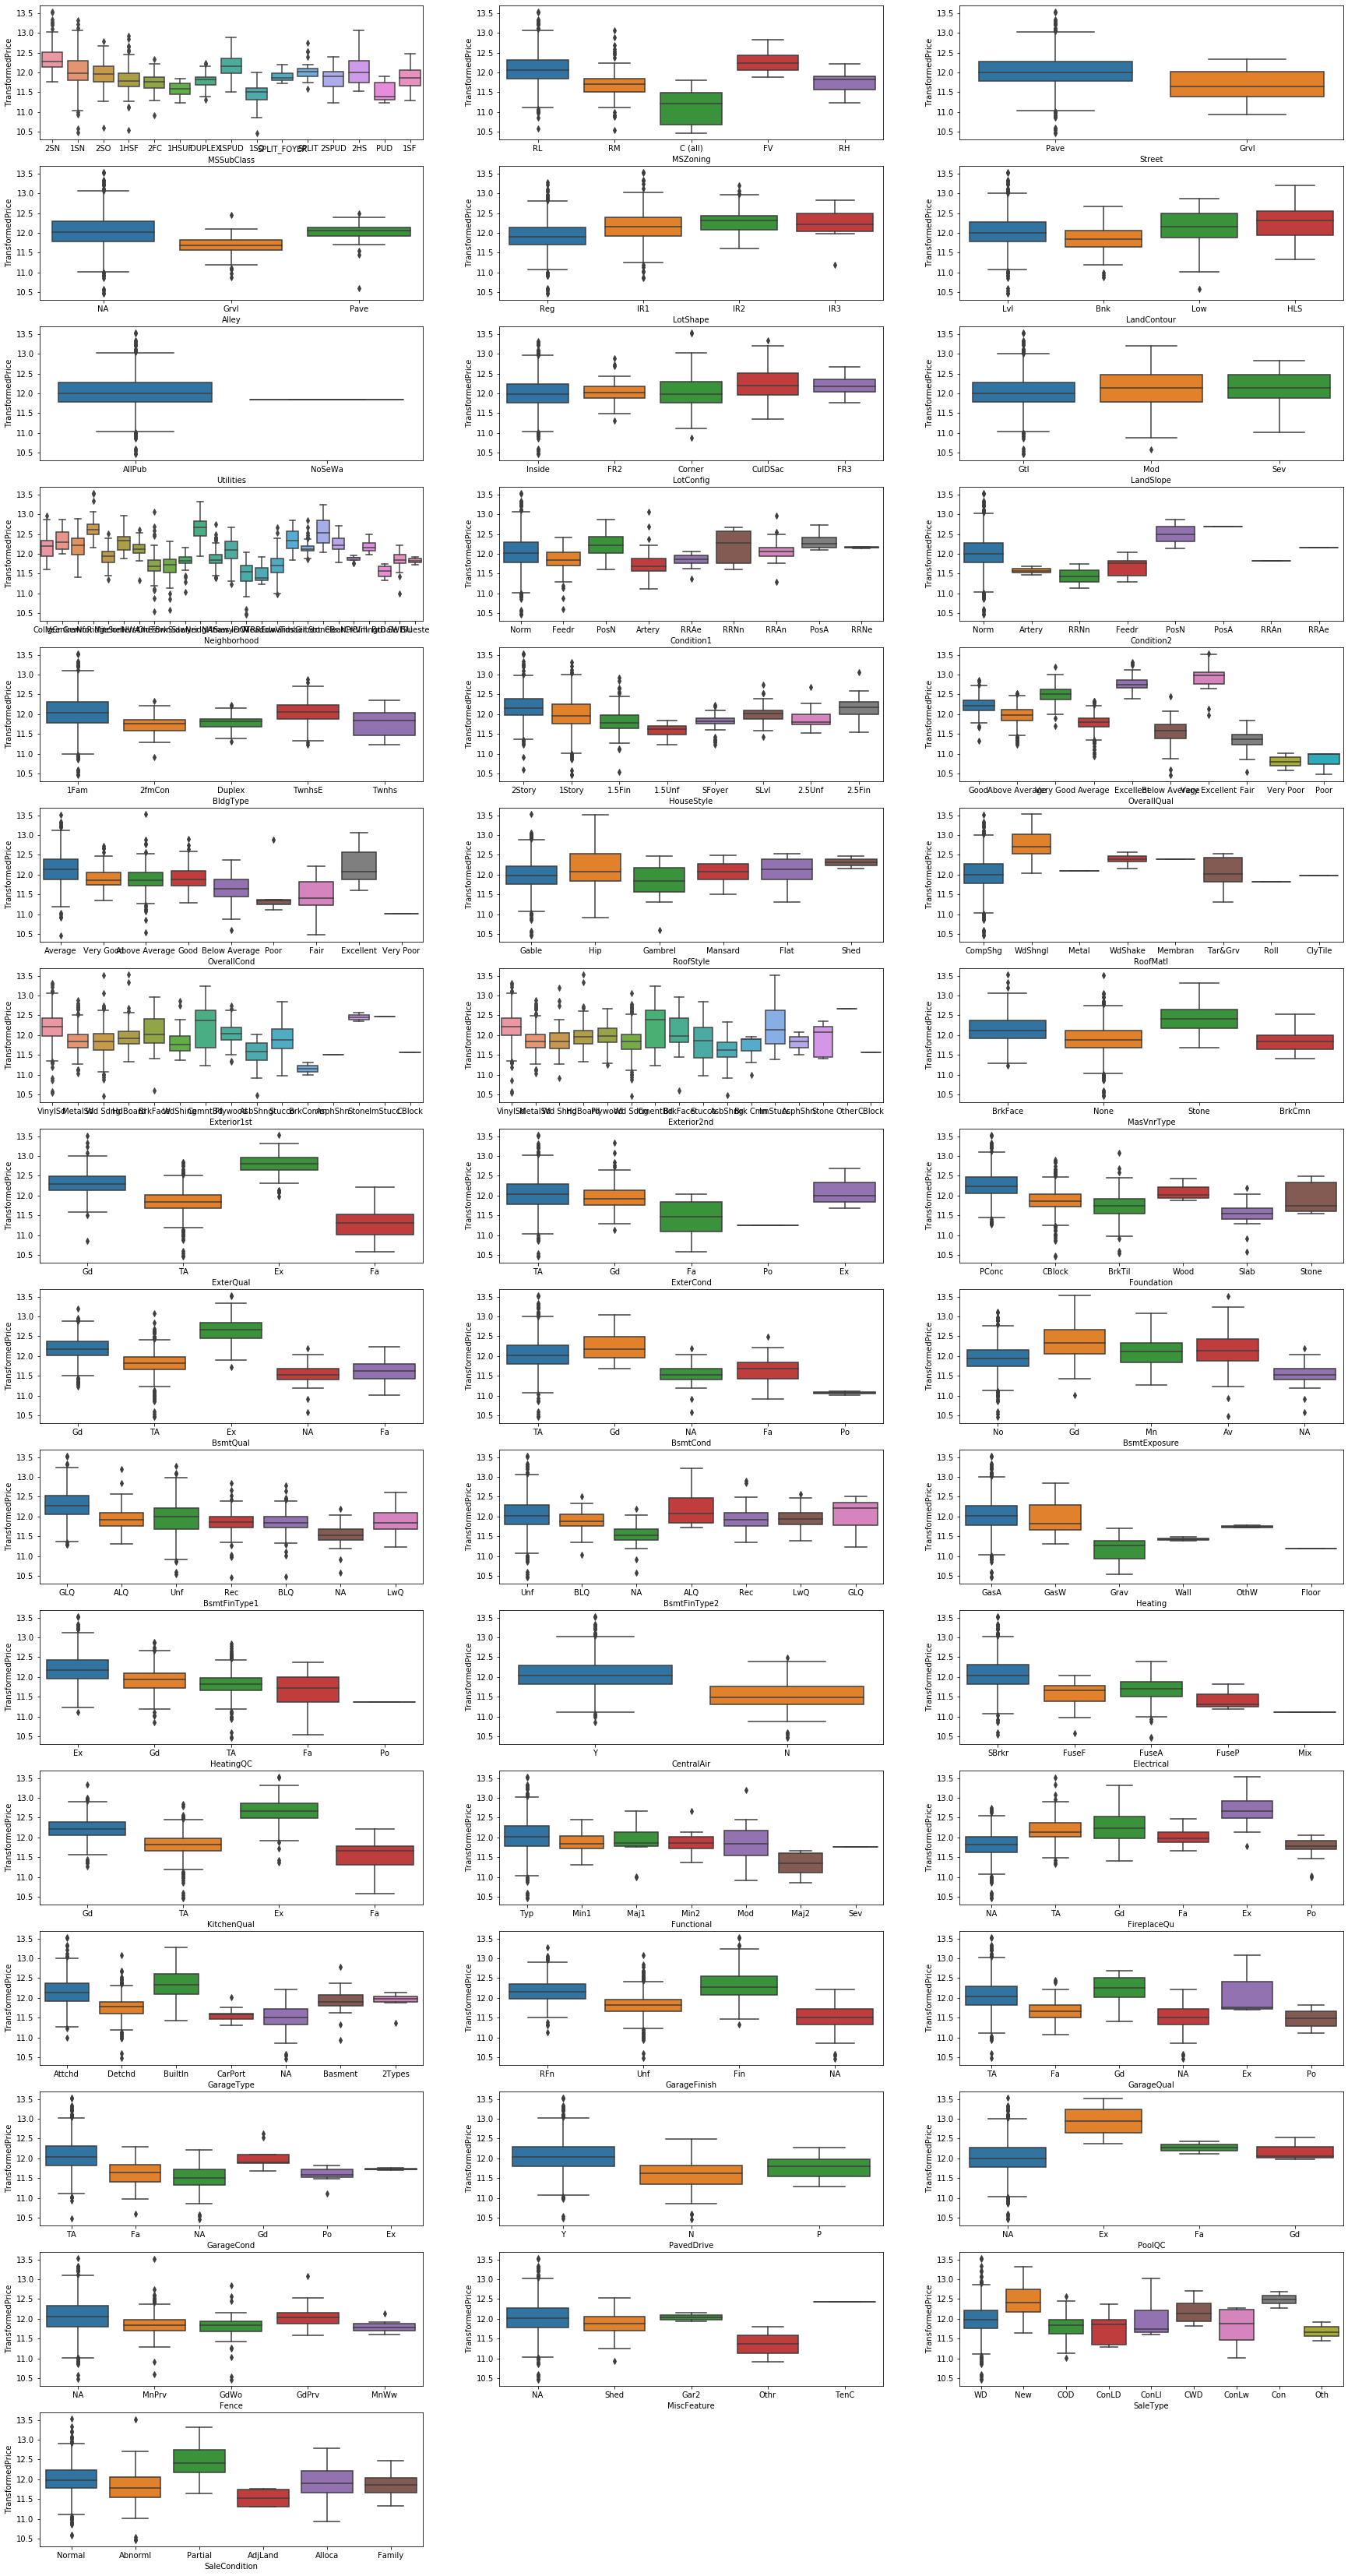

In [147]:
plt.figure(figsize=(30,60))
plt.tight_layout()

# Title names for the columns in the dataset


# Visualising the outliers with boxplot for all the variables 
for i in enumerate(categorical_col):
    plt.subplot(16,3,i[0]+1)

    sns.boxplot(x=df[i[1]],y='TransformedPrice',data=df)  # using boxplot

In [148]:
df.Utilities.value_counts()# dropping this column no information all values of the first type

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [149]:
df.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [150]:
df.drop(['Utilities','CentralAir'],axis=1,inplace=True)

## Dummy creation for categorical var


In [151]:
categorical_col=df.select_dtypes(include=['object']).columns

In [152]:
# Categorical value encoding -> OHE(dummy variables) / LabelEncoder or below method

for i in categorical_col:
    feature_set = set(df[i])
    for j in feature_set:
        feature_list = list(feature_set)
        df.loc[df[i] == j,i] = feature_list.index(j)

In [153]:
df.shape

(1460, 72)

In [154]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,TransformedPrice
0,1,1,3,65.0,8450.0,1,2,3,1,2,...,0,0,0,2,4,4,0,5,0,12.247694
1,2,7,3,80.0,9600.0,1,2,3,1,3,...,0,0,0,2,4,4,0,5,0,12.109011
2,3,1,3,68.0,11250.0,1,2,2,1,2,...,0,0,0,2,4,4,0,5,0,12.317167
3,4,0,3,60.0,9550.0,1,2,2,1,0,...,0,0,0,2,4,4,0,5,1,11.849398
4,5,1,3,84.0,14260.0,1,2,2,1,3,...,0,0,0,2,4,4,0,5,0,12.429216


## Train Test Split

In [155]:
X = df.drop(['Id','TransformedPrice'],axis=1)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
0,1,3,65.0,8450.0,1,2,3,1,2,0,...,0,0,0,0,2,4,4,0,5,0
1,7,3,80.0,9600.0,1,2,3,1,3,0,...,0,0,0,0,2,4,4,0,5,0
2,1,3,68.0,11250.0,1,2,2,1,2,0,...,0,0,0,0,2,4,4,0,5,0
3,0,3,60.0,9550.0,1,2,2,1,0,0,...,272,0,0,0,2,4,4,0,5,1
4,1,3,84.0,14260.0,1,2,2,1,3,0,...,0,0,0,0,2,4,4,0,5,0


In [156]:
y = df.TransformedPrice

In [157]:
y.shape

(1460,)

In [158]:
X.shape

(1460, 70)

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [160]:
X_train.shape

(1021, 70)

In [161]:
y_train.shape

(1021,)

## Feature Scaling

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
num_cols=X_train.describe().columns

In [164]:
num_cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', '

In [165]:
X_train.shape

(1021, 70)

In [166]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
210,1.393436,0.471486,-0.117261,-0.882125,0.062715,0.247555,0.692628,-0.190802,0.228810,-0.228471,...,1.150231,-0.121922,-0.275126,-0.062302,0.039618,0.453774,0.168681,-0.186504,0.319596,-0.399982
318,-1.185473,0.471486,1.036457,-0.021387,0.062715,0.247555,0.692628,-2.308294,0.228810,3.305904,...,1.910043,-0.121922,-0.275126,-0.062302,0.039618,0.453774,0.168681,-0.186504,0.319596,-0.399982
239,-0.898927,0.471486,-0.869686,-0.253602,0.062715,0.247555,0.692628,-0.190802,0.228810,-0.228471,...,-0.369395,-0.121922,-0.275126,-0.062302,0.039618,-2.091847,0.168681,-0.186504,0.319596,-0.399982
986,-0.898927,-2.274066,-0.518555,-0.941030,0.062715,0.247555,0.692628,-0.190802,-1.767898,-0.228471,...,-0.369395,-0.121922,-0.275126,-0.062302,0.039618,0.453774,0.168681,-0.186504,0.319596,-0.399982
1416,0.820345,-2.274066,-0.468393,0.267128,0.062715,0.247555,0.692628,-0.190802,0.228810,-0.228471,...,1.435160,-0.121922,-0.275126,-0.062302,0.039618,0.453774,0.168681,-0.186504,0.319596,-0.399982


In [167]:
X_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03
mean,1.051504e-16,1.565839e-16,5.394531e-16,1.274826e-16,6.116557e-16,-2.775014e-16,5.663116e-16,-1.356516e-16,3.892849e-17,2.014930e-16,...,-1.339662e-16,9.936007e-17,-3.273038e-17,-1.950638e-16,5.603853e-16,1.683276e-16,-6.062731e-16,2.065493e-16,1.563664e-16,3.725935e-16
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00
min,-1.472018e+00,-2.274066e+00,-2.424698e+00,-1.668330e+00,-1.594522e+01,-4.566796e+00,-4.334672e+00,-2.308294e+00,-1.767898e+00,-2.284708e-01,...,-3.693947e-01,-1.219220e-01,-2.751255e-01,-6.230154e-02,-2.018514e+01,-2.940387e+00,-1.389036e+01,-1.865037e-01,-4.876387e+00,-3.999822e-01
25%,-8.989274e-01,4.714856e-01,-4.683931e-01,-5.130656e-01,6.271472e-02,2.475548e-01,-9.831384e-01,-1.908024e-01,2.288097e-01,-2.284708e-01,...,-3.693947e-01,-1.219220e-01,-2.751255e-01,-6.230154e-02,3.961756e-02,4.537736e-01,1.686809e-01,-1.865037e-01,3.195962e-01,-3.999822e-01
50%,5.337995e-01,4.714856e-01,3.572949e-02,-1.015304e-01,6.271472e-02,2.475548e-01,6.926284e-01,-1.908024e-01,2.288097e-01,-2.284708e-01,...,-3.693947e-01,-1.219220e-01,-2.751255e-01,-6.230154e-02,3.961756e-02,4.537736e-01,1.686809e-01,-1.865037e-01,3.195962e-01,-3.999822e-01
75%,5.337995e-01,4.714856e-01,4.345168e-01,3.015899e-01,6.271472e-02,2.475548e-01,6.926284e-01,-1.908024e-01,2.288097e-01,-2.284708e-01,...,-3.693947e-01,-1.219220e-01,-2.751255e-01,-6.230154e-02,3.961756e-02,4.537736e-01,1.686809e-01,-1.865037e-01,3.195962e-01,-3.999822e-01
max,2.539617e+00,1.386670e+00,3.414621e+00,5.522045e+00,6.271472e-02,2.475548e-01,6.926284e-01,4.044181e+00,2.225517e+00,6.840278e+00,...,8.368451e+00,1.559696e+01,7.050058e+00,1.871638e+01,1.015200e+01,4.537736e-01,1.686809e-01,6.637199e+00,3.437186e+00,5.825350e+00


In [168]:
X_train.isna().sum().sort_values(ascending=False).head(60) ## features with missing data from high to low 

SaleCondition    0
ExterCond        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
YearBuilt        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
RoofStyle        0
OverallCond      0
SaleType         0
LandContour      0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LotConfig        0
OverallQual      0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
BsmtFinSF2       0
BsmtUnfSF        0
Heating          0
EnclosedPorch    0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
3SsnPorch        0
HeatingQC        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
GarageFinish

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# Instantiate

lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [170]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

12.022188172224935
[-0.00177761 -0.00363531  0.00973358  0.00846088  0.00800003 -0.00410833
  0.00185117 -0.00556979  0.00651659  0.00274143 -0.01963188 -0.00676801
 -0.02749409 -0.017978   -0.00829467  0.01783771  0.01005769 -0.10519101
 -0.00169158  0.01442602  0.00061949  0.00601699  0.00350083 -0.00372482
  0.00745919  0.00531065  0.01739956 -0.01238534 -0.00723704  0.0010713
  0.003169    0.0922589   0.0020836   0.02497223  0.06916136 -0.0030796
 -0.00897885 -0.00598344  0.10985614  0.13687637  0.00289658  0.02257152
  0.02085723  0.01192303  0.0231754  -0.00227046 -0.02100627 -0.0304459
 -0.01055147 -0.00089907  0.03481798  0.00424732  0.00447325  0.01472571
  0.03365113  0.01146051 -0.02501846  0.00509119  0.01755632 -0.00257121
  0.0077283   0.0050634   0.01290933 -0.01417443  0.01342654 -0.00251753
  0.00157112 -0.00396608 -0.01369336 -0.01110918]


In [171]:
X_train.shape

(1021, 70)

In [172]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8597401284614907
0.793570394862376
22.5106212878403
14.877086662468987
0.022047621241763272
0.03396595128417577


## Selecting features from RFE

In [173]:
### from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
rfe = RFE(lm, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [174]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [175]:
X_train_rfe.head()

,Neighborhood,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,RoofMatl,Foundation,BsmtQual,BsmtFinSF1,...,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,ScreenPorch,PoolArea,SaleType,SaleCondition
210,1.305449,-0.016589,-0.425577,-0.313074,-1.367167,1.524903,0.085475,-0.831794,-0.755946,0.061779,...,-0.925422,-0.298192,-2.217786,3.706819,3.616083,-0.743160,-0.275126,-0.062302,0.319596,-0.399982
318,1.579644,-0.016589,-0.425577,0.477158,-0.170016,-0.717033,0.085475,0.193884,1.000188,1.270041,...,0.623522,1.267125,0.867506,-0.303773,-0.294956,1.989482,-0.275126,-0.062302,0.319596,-0.399982
239,1.305449,-0.016589,-0.425577,-1.103306,0.428559,0.865510,0.085475,-0.831794,-0.755946,-0.808914,...,0.623522,-1.080850,-1.183084,-0.303773,-0.294956,-0.743160,-0.275126,-0.062302,0.319596,-0.399982
986,1.168351,-0.016589,-0.425577,-1.103306,2.822859,2.019448,0.085475,-0.831794,-0.755946,-1.027752,...,-0.925422,-1.080850,-1.018473,1.033091,-0.294956,2.423490,-0.275126,-0.062302,0.319596,-0.399982
1416,1.168351,-0.016589,1.411693,0.082042,-1.367167,2.843689,0.085475,0.193884,-0.755946,-1.027752,...,-0.925422,-1.080850,0.416000,-0.303773,-0.294956,-0.743160,-0.275126,-0.062302,0.319596,-0.399982


In [176]:
X_train = X_train_rfe[X_train_rfe.columns]


In [177]:

#X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Ridge and Lasso

In [178]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV


In [179]:
len(X_train.columns)

30

In [180]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [181]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [182]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha=20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.02002641 -0.02522217 -0.02169094  0.01928937  0.00954477 -0.10491038
  0.01434986  0.01547089 -0.01485613  0.08821824  0.02289481  0.06634731
  0.07053231  0.08804148  0.07659222  0.02333092  0.01012322  0.02646873
 -0.01819186 -0.03243916  0.03408425  0.0193811   0.03897524  0.00813648
 -0.02117969  0.01803783  0.01202183 -0.01732692 -0.01439852 -0.01147294]


In [183]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8539338874901126
0.795704677230599
23.442477920667393
14.723271981996847
0.022960311381652686
0.03361477621460467


## Lasso

In [184]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [185]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [186]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(8)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010194,0.001720,0.003598,4.900766e-04,0.0001,{'alpha': 0.0001},-0.102372,-0.115177,-0.110429,-0.103041,...,-0.106182,0.005708,2,-0.103971,-0.100622,-0.100780,-0.104725,-0.105646,-0.103149,0.002068
1,0.009594,0.002332,0.002999,8.937227e-04,0.001,{'alpha': 0.001},-0.101392,-0.115253,-0.110603,-0.102705,...,-0.106015,0.005890,1,-0.103997,-0.100824,-0.100521,-0.104729,-0.105573,-0.103129,0.002069
2,0.003598,0.000489,0.001998,6.468134e-07,0.01,{'alpha': 0.01},-0.105245,-0.119191,-0.121233,-0.107700,...,-0.112903,0.006289,3,-0.110904,-0.108084,-0.109036,-0.111782,-0.112399,-0.110441,0.001636
3,0.005796,0.000979,0.003797,3.996850e-04,0.05,{'alpha': 0.05},-0.122645,-0.135734,-0.138086,-0.133456,...,-0.133728,0.005845,4,-0.134297,-0.130488,-0.129661,-0.133708,-0.135082,-0.132647,0.002161
4,0.005597,0.001356,0.003198,7.479205e-04,0.1,{'alpha': 0.1},-0.159943,-0.168658,-0.165653,-0.166111,...,-0.167096,0.004919,5,-0.167640,-0.164771,-0.163645,-0.165401,-0.168608,-0.166013,0.001839
5,0.002998,0.000632,0.001999,2.431402e-07,0.2,{'alpha': 0.2},-0.252718,-0.259329,-0.246674,-0.241529,...,-0.253720,0.009432,6,-0.252773,-0.252636,-0.252173,-0.250473,-0.255467,-0.252704,0.001607
6,0.005597,0.003005,0.003198,7.480351e-04,0.3,{'alpha': 0.3},-0.313295,-0.313484,-0.305876,-0.296961,...,-0.310647,0.008869,7,-0.309932,-0.308826,-0.311153,-0.312981,-0.307375,-0.310053,0.001922
7,0.003997,0.001264,0.002199,1.165550e-03,0.4,{'alpha': 0.4},-0.313295,-0.313484,-0.305876,-0.296961,...,-0.310647,0.008869,7,-0.309932,-0.308826,-0.311153,-0.312981,-0.307375,-0.310053,0.001922


In [187]:
print(model_cv.best_params_['alpha'])

0.001


In [188]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha=0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [189]:

lasso.coef_

array([-0.01929404, -0.02509051, -0.02086868,  0.01805778,  0.0091196 ,
       -0.10722037,  0.01338508,  0.01555189, -0.01352141,  0.09264047,
        0.0240673 ,  0.0691035 ,  0.0828085 ,  0.10335027,  0.06207982,
        0.02074944,  0.00863585,  0.02317695, -0.017779  , -0.03237742,
        0.03357886,  0.01802577,  0.03784371,  0.        , -0.01307492,
        0.01707613,  0.01088899, -0.01712234, -0.0125369 , -0.00980504])

In [190]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8540022678133812
0.7965996515562151
23.431503409256855
14.658772461232855
0.022949562594766753
0.03346751703477821


In [191]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.859740,0.853934,0.854002
1,R2 Score (Test),0.793570,0.795705,0.796600
2,RSS (Train),22.510621,23.442478,23.431503
3,RSS (Test),14.877087,14.723272,14.658772
4,MSE (Train),0.148484,0.151527,0.151491
5,MSE (Test),0.184299,0.183343,0.182941


In [192]:
## Good Test scores for both ridge and Lasso over simple linear regression , reducing the overfiiting 

In [193]:

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':abs(ridge.coef_.round(4))})
ridge_df.reset_index(drop=True, inplace=True)
ridge_top_10=ridge_df.sort_values('Coefficient',ascending = False).head(10)

In [194]:
ridge_df

,Features,Coefficient
0,Neighborhood,0.0200
1,Condition2,0.0252
2,BldgType,0.0217
3,OverallQual,0.0193
4,OverallCond,0.0095
5,YearBuilt,0.1049
6,RoofMatl,0.0143
7,Foundation,0.0155
8,BsmtQual,0.0149
9,BsmtFinSF1,0.0882


In [195]:
ridge_top_10

,Features,Coefficient
5,YearBuilt,0.1049
9,BsmtFinSF1,0.0882
13,2ndFlrSF,0.0880
14,GrLivArea,0.0766
12,1stFlrSF,0.0705
11,BsmtUnfSF,0.0663
22,GarageArea,0.0390
20,Fireplaces,0.0341
19,KitchenAbvGr,0.0324
17,FullBath,0.0265


In [196]:

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':abs(lasso.coef_.round(4))})
#lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_top10=lasso_df.sort_values('Coefficient',ascending = False).head(10)


In [197]:
lasso_df

,Features,Coefficient
0,Neighborhood,0.0193
1,Condition2,0.0251
2,BldgType,0.0209
3,OverallQual,0.0181
4,OverallCond,0.0091
5,YearBuilt,0.1072
6,RoofMatl,0.0134
7,Foundation,0.0156
8,BsmtQual,0.0135
9,BsmtFinSF1,0.0926


In [198]:
lasso_df.shape

(30, 2)

In [199]:
lasso_top10

,Features,Coefficient
5,YearBuilt,0.1072
13,2ndFlrSF,0.1034
9,BsmtFinSF1,0.0926
12,1stFlrSF,0.0828
11,BsmtUnfSF,0.0691
14,GrLivArea,0.0621
22,GarageArea,0.0378
20,Fireplaces,0.0336
19,KitchenAbvGr,0.0324
1,Condition2,0.0251


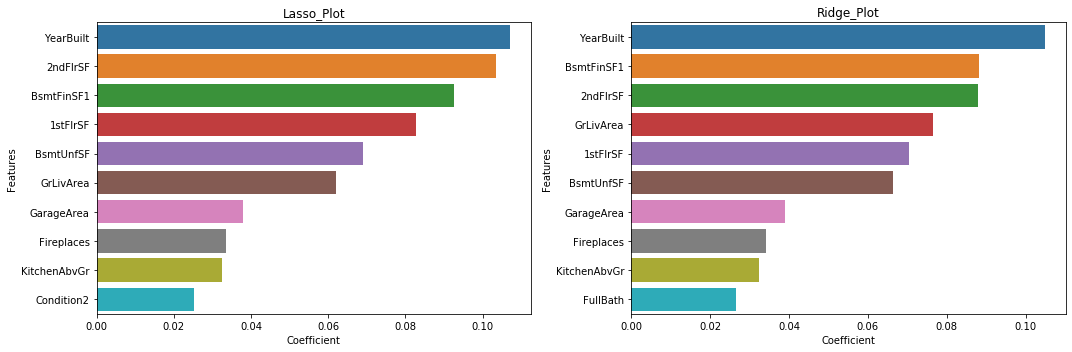

In [200]:

# bar plot to determine the variables that would affect pricing most using Lasso regression

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.gca().set_title('Lasso_Plot')
sns.barplot(y = 'Features', x='Coefficient',  data = lasso_top10)

plt.subplot(1,2,2)
plt.gca().set_title('Ridge_Plot')
sns.barplot(y = 'Features', x='Coefficient',  data = ridge_top_10)
plt.tight_layout()
plt.show()